# Exploratory Data Analysis

## Dataset overview

In [6]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_3_final.csv", sep=";")

In [5]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627803 non-null  int64  
 1   NIVEL                           627803 non-null  int64  
 2   NIVEL_GOBIERNO                  627803 non-null  object 
 3   DPTO                            627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627803 non-null  object 
 5   FUNCION                         627803 non-null  int64  
 6   FUNCION_NOMBRE                  627803 non-null  object 
 7   PIA                             627803 non-null  int64  
 8   PIM                             627803 non-null  int64  
 9   DEVENGADO                       627803 non-null  float64
 10  IP                              627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627803 non-null  int64  
 12  NRO_PRESIDENTES_

In [25]:
#df_entrada.drop(df_entrada.columns[0], axis=1, inplace=True)


In [28]:
df_entrada.head()

ANIO  NIVEL NIVEL_GOBIERNO  DPTO DEPARTAMENTO_EJECUTORA_NOMBRE  FUNCION  \
0  2012      1              E     6                     CAJAMARCA       22   
1  2012      1              E     6                     CAJAMARCA       22   
2  2012      1              E     6                     CAJAMARCA       22   
3  2012      1              E     6                     CAJAMARCA       22   
4  2012      1              E     6                     CAJAMARCA       22   

  FUNCION_NOMBRE      PIA      PIM  DEVENGADO  ...  ELECCION_REGIONAL_LOCAL  \
0      EDUCACION   650000   650000       0.00  ...                        0   
1      EDUCACION        0  2569664       0.00  ...                        0   
2      EDUCACION  1741207  1741207       0.00  ...                        0   
3      EDUCACION  1953089  1953089       0.00  ...                        0   
4      EDUCACION        0   765194  608550.46  ...                        0   

   TIPO_GOBIERNO_NACIONAL  NRO_CONFLICTO_SOCIAL_X_ANO  INFLACION_ANUAL  \
0        Centro izquierda                         164             2.65   
1        Centro izquierda                         164             2.65   
2        Centro izquierda                         164             2.65   
3        Centro izquierda                         164             2.65   
4        Centro izquierda                         164             2.65   

   PROYECTO  EJECUTORA  PROYECTO_EDAD_NETA PROYECTO_EDAD_BRUTA  AVANCE  CLASE  
0   2022276          1                   2                   6  0.0000      0  
1   2022277          1                   8                   8  0.0000      0  
2   2029485          1                   1                   1  0.0000      0  
3   2077912          1                   1                   1  0.0000      0  
4   2087965          1                   4                   4  0.7953      0  

[5 rows x 26 columns]

## Analisis de variables Categoricas y Numericas

In [8]:
(
    df_entrada
    .astype({
        'ANIO': 'category',
        'NIVEL': 'category',
        'NIVEL_GOBIERNO': 'category',
        'DEPARTAMENTO_EJECUTORA_NOMBRE': 'category',
        'FUNCION_NOMBRE': 'category',
        'TIPO_GOBIERNO_NACIONAL': 'category',
        'EJECUTORA': 'category',
    })
).describe(include='category').T

count unique             top    freq
ANIO                           627803     12            2022   62904
NIVEL                          627803      3               3  507958
NIVEL_GOBIERNO                 627803      3               M  507958
DEPARTAMENTO_EJECUTORA_NOMBRE  627803     25            LIMA   97085
FUNCION_NOMBRE                 627803     25      TRANSPORTE  135721
TIPO_GOBIERNO_NACIONAL         627803      3  Centro derecha  257739
EJECUTORA                      627803   2536            1443    7945

<Axes: title={'center': 'Distribución de registros por año'}, xlabel='Año', ylabel='Cantidad de registros'>

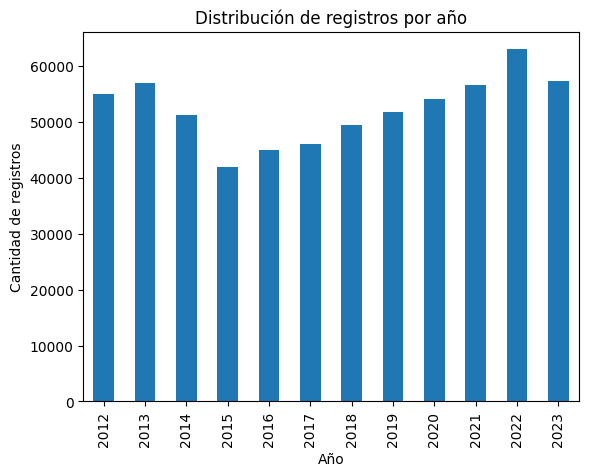

In [30]:
(
    df_entrada
    .ANIO
    .value_counts()
    .sort_index() # Ordena los valores por el índice (anio)
    .plot(
        kind='bar',
        title='Distribución de registros por año',
        xlabel='Año',
        ylabel='Cantidad de registros'
    )
)

### Distribucion

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


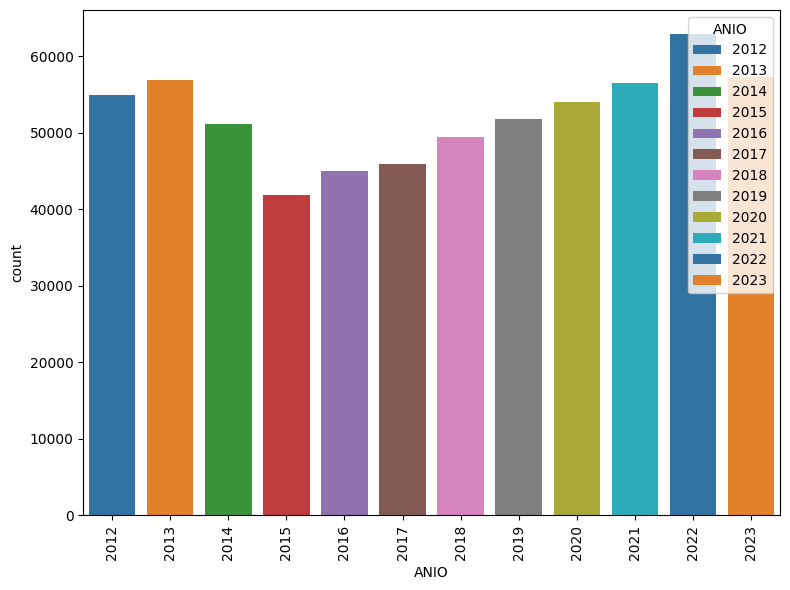

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


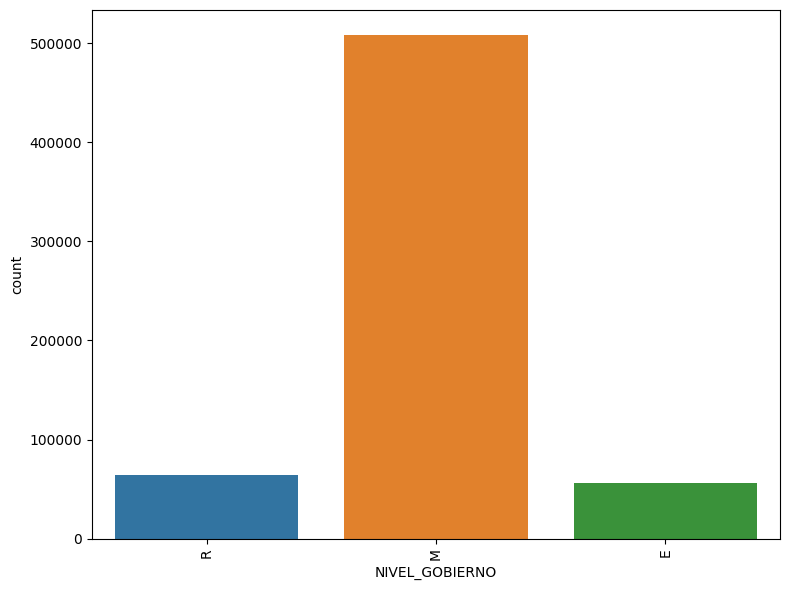

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


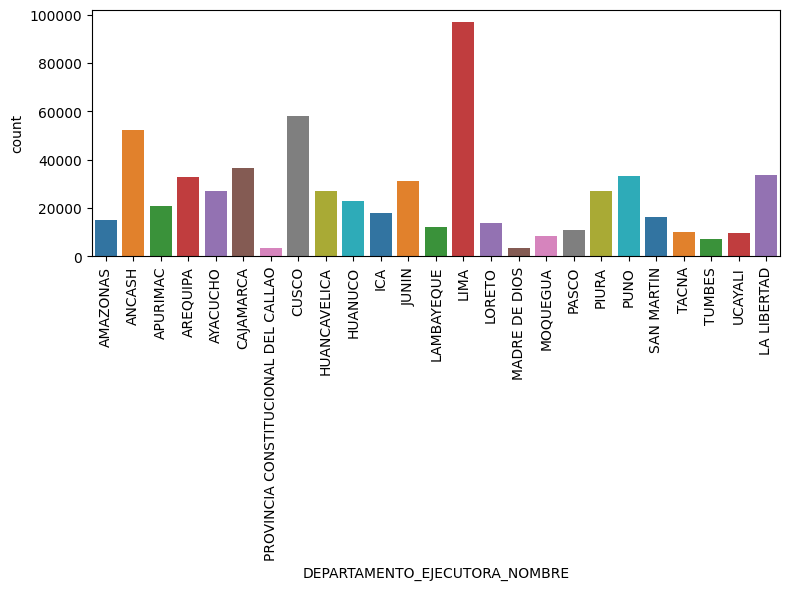

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


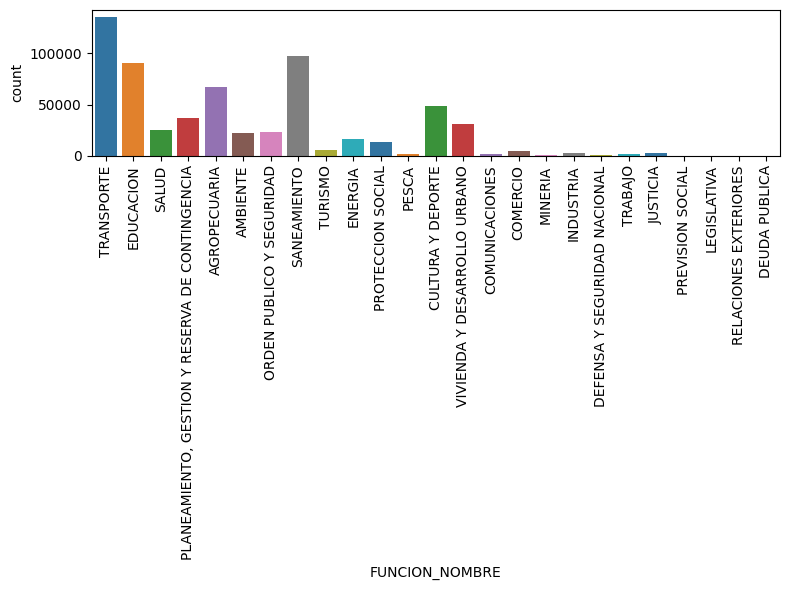

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


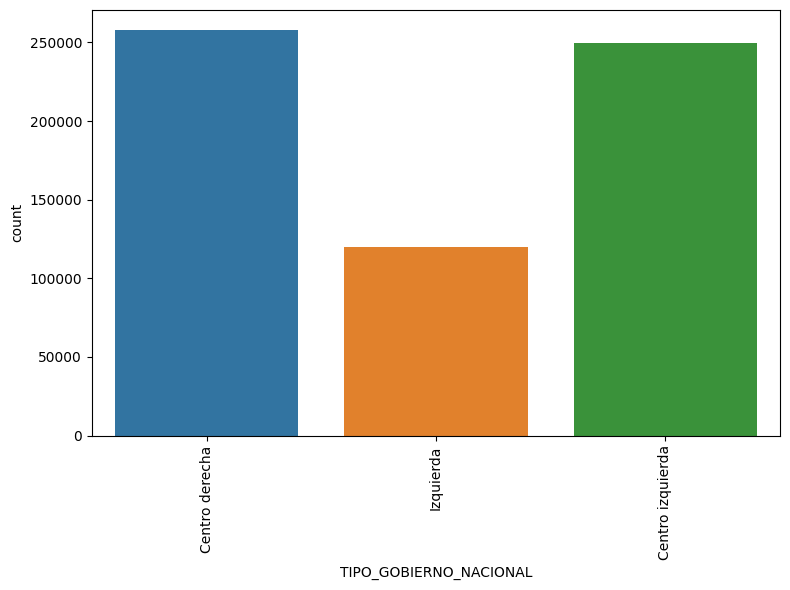

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


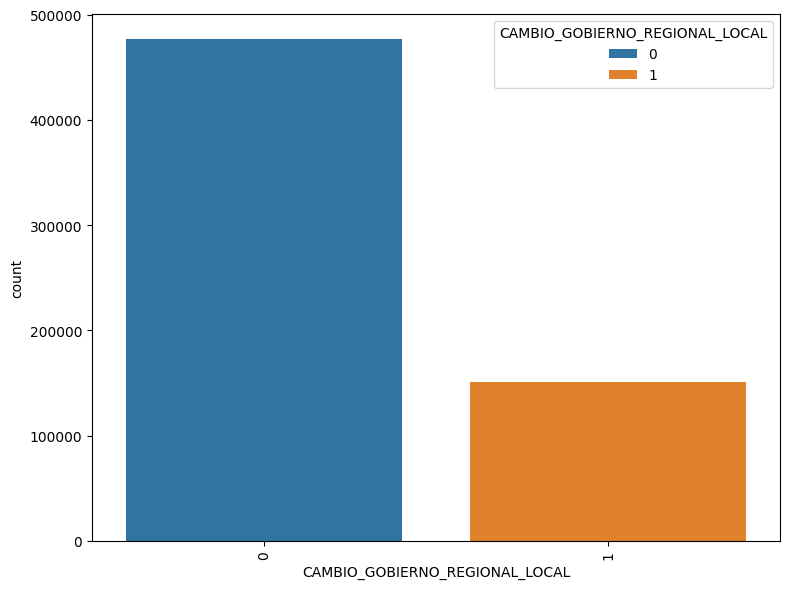

C:\Users\ycald\AppData\Local\Temp\ipykernel_11352\3056805179.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


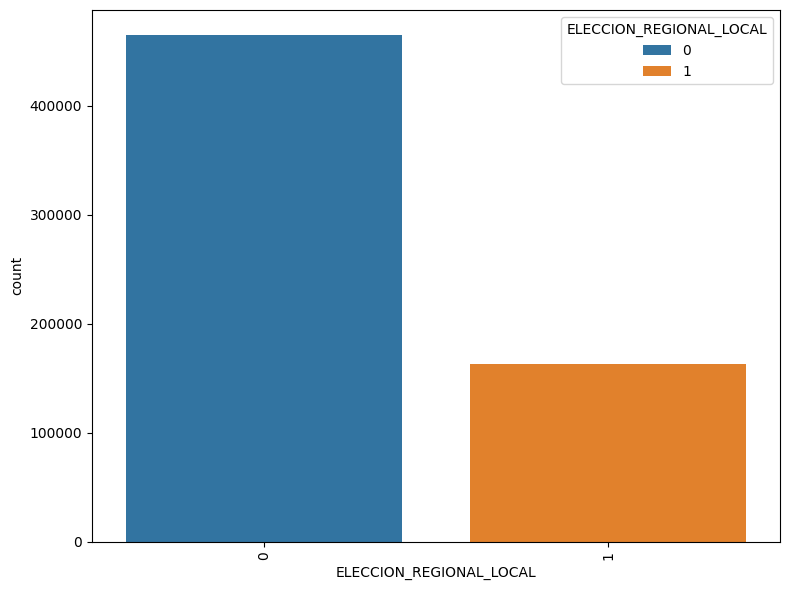

In [12]:
colores_personalizados = ['green', 'blue', 'orange']
columnas_categoricas = ['ANIO','NIVEL_GOBIERNO', 'DEPARTAMENTO_EJECUTORA_NOMBRE', 'FUNCION_NOMBRE', 'TIPO_GOBIERNO_NACIONAL', 'CAMBIO_GOBIERNO_REGIONAL_LOCAL', 'ELECCION_REGIONAL_LOCAL']
for col in columnas_categoricas:
    fig, ax = plt.subplots(figsize=(8, 6))  # Aumentamos el ancho para estirar horizontalmente
    
    sns.countplot(
        data=df_entrada,
        x=col,
        hue=col,
        palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

### Distribucion con la variable objetivo


In [9]:
def plot_categorical(column):
    #fig = plt.figure(figsize=(10, 5))    
    #sns.countplot(data=df_entrada, x=column, hue='CLASE')
    #plt.show()
    fig, ax = plt.subplots(figsize=(8, 6))  # Aumentamos el ancho para estirar horizontalmente

    sns.countplot(
        data=df_entrada,
        x=column,
        hue='CLASE',
        #palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

In [10]:
for col in columnas_categoricas:
    plot_categorical(col)

NameError: name 'columnas_categoricas' is not defined

In [4]:
num_var = ['PIA'
        ,'PIM'
        ,'DEVENGADO'
        ,'IP'
        ,'NRO_PRESIDENTES_X_ANO'
        ,'NRO_CONFLICTO_SOCIAL_X_ANO'
        ,'INFLACION_ANUAL'
        ,'PROYECTO_EDAD_NETA'
        ,'PROYECTO_EDAD_BRUTA'
        ,'AVANCE'
        ,'CLASE']
cat_var = ['ANIO'
,'NIVEL'
,'NIVEL_GOBIERNO'
,'DPTO'
,'DEPARTAMENTO_EJECUTORA_NOMBRE'
,'FUNCION'
,'FUNCION_NOMBRE'
,'CAMBIO_GOBIERNO_NACIONAL'
,'FENOMENO_NINO'
,'PANDEMIA'
,'CAMBIO_GOBIERNO_REGIONAL_LOCAL'
,'ELECCION_REGIONAL_LOCAL'
,'TIPO_GOBIERNO_NACIONAL'
,'PROYECTO'
,'EJECUTORA'
,'CLASE']
df_entrada_num = df_entrada[num_var]
df_entrada_cat = df_entrada[cat_var]

In [5]:
df_entrada_num = df_entrada_num.query('DEVENGADO >= 0')
df_entrada_num = df_entrada_num.query('PIM >= DEVENGADO')
df_entrada_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627804 entries, 0 to 627869
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   PIA                         627804 non-null  int64  
 1   PIM                         627804 non-null  int64  
 2   DEVENGADO                   627804 non-null  float64
 3   IP                          627804 non-null  float64
 4   NRO_PRESIDENTES_X_ANO       627804 non-null  int64  
 5   NRO_CONFLICTO_SOCIAL_X_ANO  627804 non-null  int64  
 6   INFLACION_ANUAL             627804 non-null  float64
 7   PROYECTO_EDAD_NETA          627804 non-null  int64  
 8   PROYECTO_EDAD_BRUTA         627804 non-null  int64  
 9   AVANCE                      627804 non-null  float64
 10  CLASE                       627804 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 57.5 MB


In [7]:
num_var=['PIA'
,'PIM'
,'DEVENGADO'
,'IP'
,'NRO_PRESIDENTES_X_ANO'
,'NRO_CONFLICTO_SOCIAL_X_ANO'
,'INFLACION_ANUAL'
,'PROYECTO_EDAD_NETA'
,'PROYECTO_EDAD_BRUTA'
,'AVANCE']
df_entrada_num = df_entrada[num_var]


In [8]:
cat_var = ['ANIO'
,'NIVEL'
,'NIVEL_GOBIERNO'
,'DPTO'
,'DEPARTAMENTO_EJECUTORA_NOMBRE'
,'FUNCION'
,'FUNCION_NOMBRE'
,'CAMBIO_GOBIERNO_NACIONAL'
,'FENOMENO_NINO'
,'PANDEMIA'
,'CAMBIO_GOBIERNO_REGIONAL_LOCAL'
,'ELECCION_REGIONAL_LOCAL'
,'TIPO_GOBIERNO_NACIONAL'
,'PROYECTO'
,'EJECUTORA'
,'CLASE']

In [9]:
df_entrada_num.describe().T

count           mean           std     min  \
PIA                         627803.0  443057.594271  9.996798e+06    0.00   
PIM                         627803.0  861418.529102  8.955925e+06    1.00   
DEVENGADO                   627803.0  603476.712067  8.180821e+06    0.00   
IP                          627803.0      26.629396  1.187226e+01    2.40   
NRO_PRESIDENTES_X_ANO       627803.0       1.512710  6.494668e-01    1.00   
NRO_CONFLICTO_SOCIAL_X_ANO  627803.0     190.774802  2.108039e+01  160.00   
INFLACION_ANUAL             627803.0       3.824652  2.164472e+00    1.36   
PROYECTO_EDAD_NETA          627803.0       4.428351  3.512983e+00    1.00   
PROYECTO_EDAD_BRUTA         627803.0       4.874137  3.711817e+00    1.00   
AVANCE                      627803.0       0.669306  4.028713e-01    0.00   

                                   25%          50%          75%           max  
PIA                             0.0000       0.0000       0.0000  2.757158e+09  
PIM                         24000.0000  100000.0000  412263.0000  1.870601e+09  
DEVENGADO                    6000.0000   40201.5000  247660.4450  1.745630e+09  
IP                             17.6000      25.2000      35.3000  5.550000e+01  
NRO_PRESIDENTES_X_ANO           1.0000       1.0000       2.0000  3.000000e+00  
NRO_CONFLICTO_SOCIAL_X_ANO    170.0000     197.0000     212.0000  2.210000e+02  
INFLACION_ANUAL                 2.1900       3.2200       5.6000  8.560000e+00  
PROYECTO_EDAD_NETA              2.0000       3.0000       6.0000  1.200000e+01  
PROYECTO_EDAD_BRUTA             2.0000       3.0000       7.0000  1.200000e+01  
AVANCE                          0.2698       0.9082       0.9999  1.000000e+00

In [1]:
df_entrada_cat = df_entrada[cat_var]
df_entrada_cat.describe().T

NameError: name 'df_entrada' is not defined

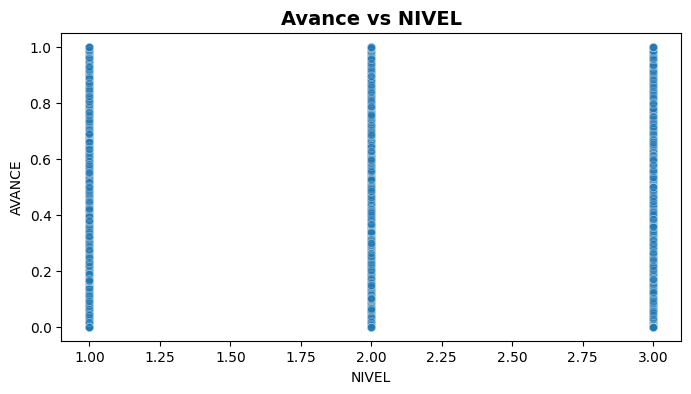

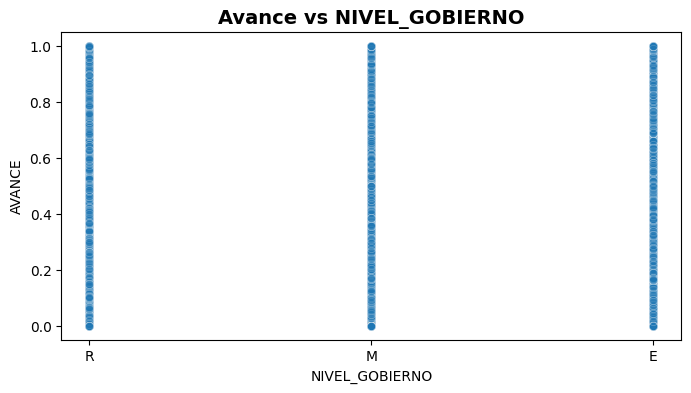

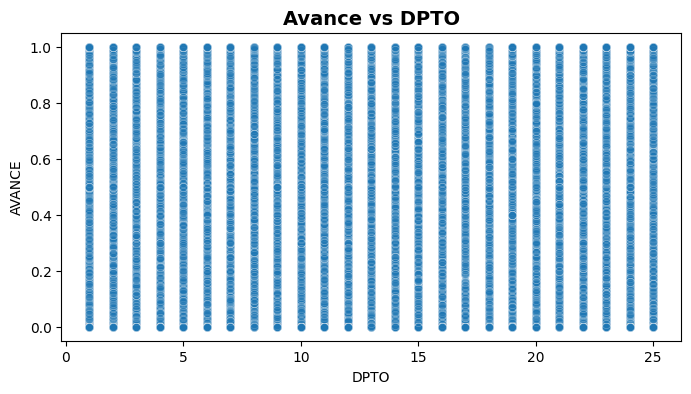

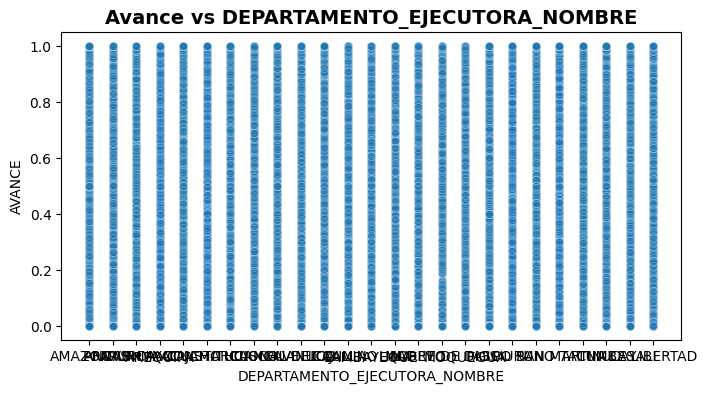

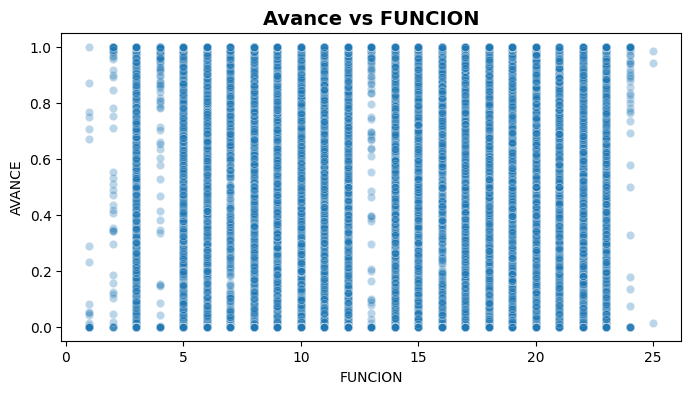

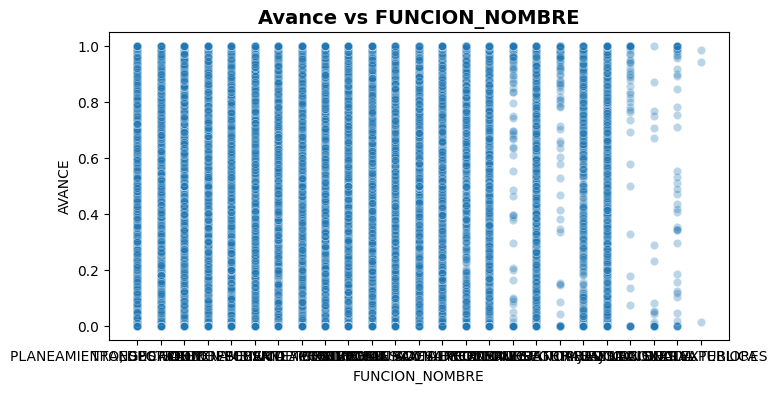

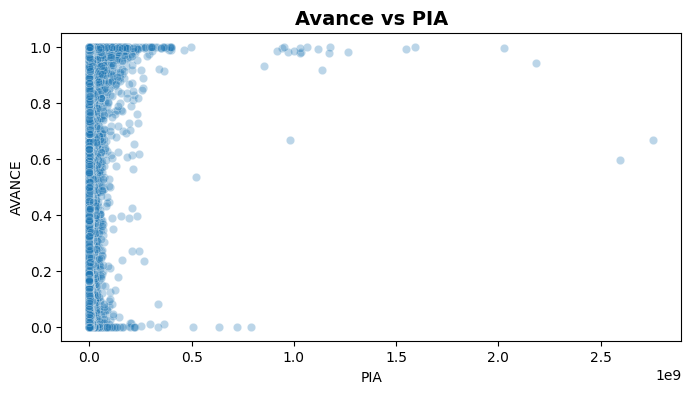

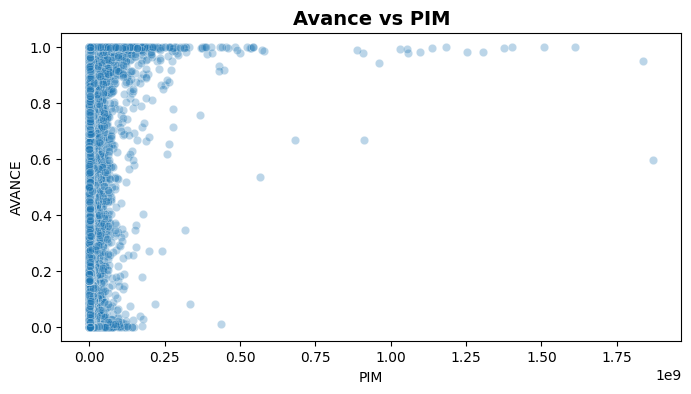

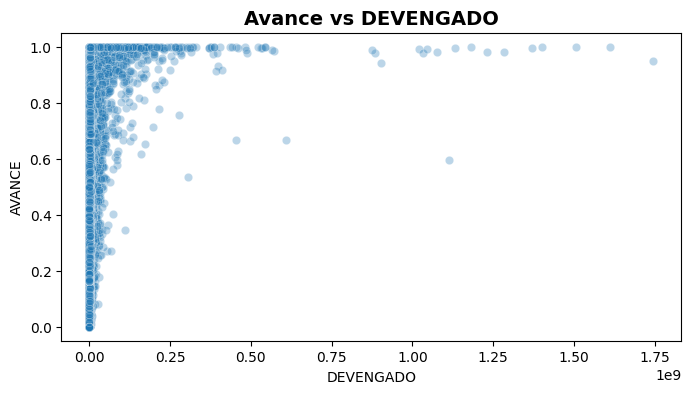

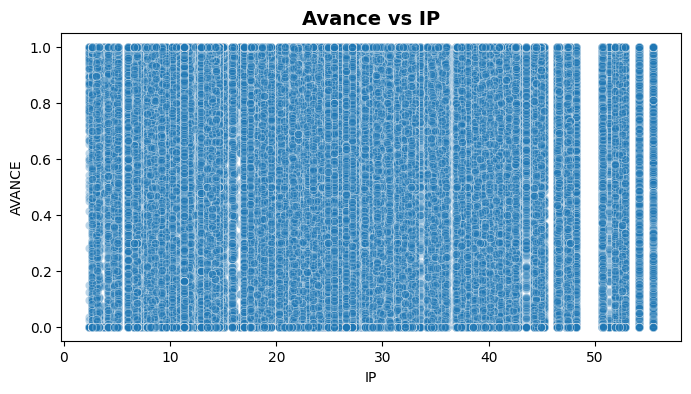

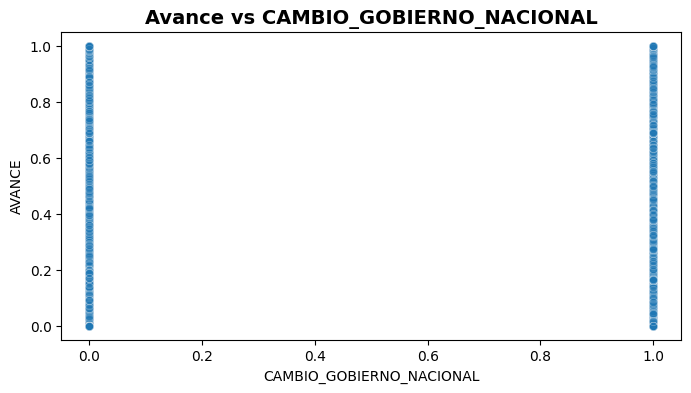

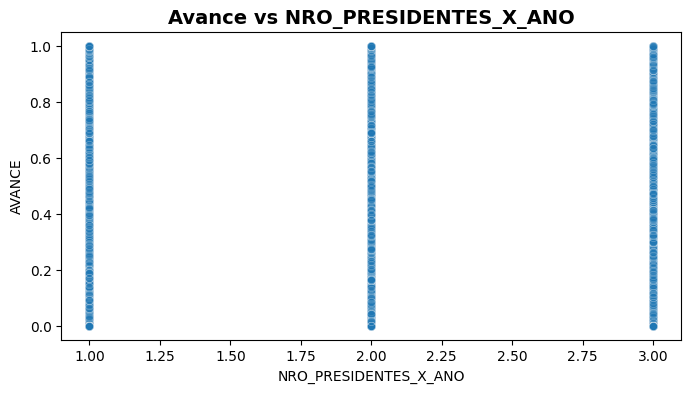

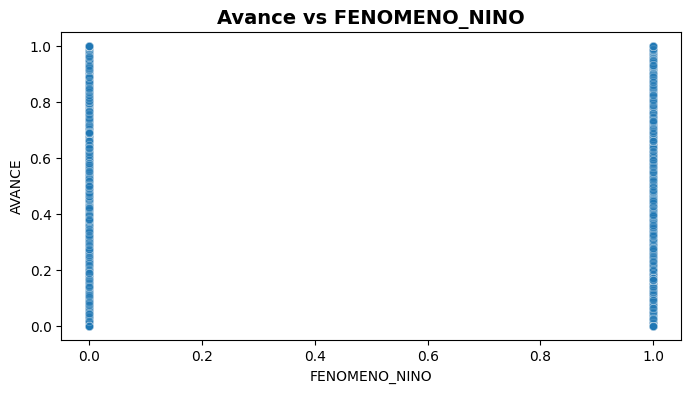

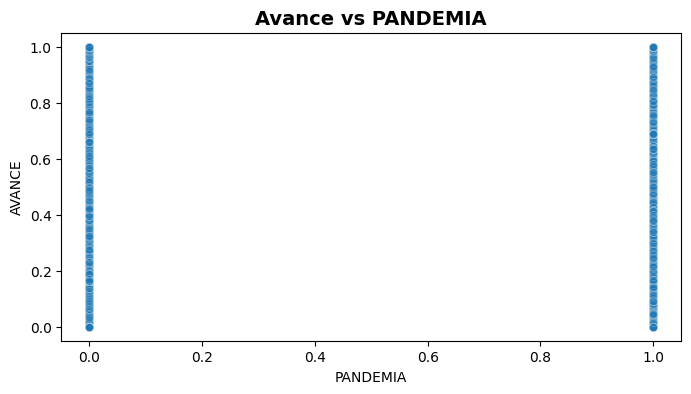

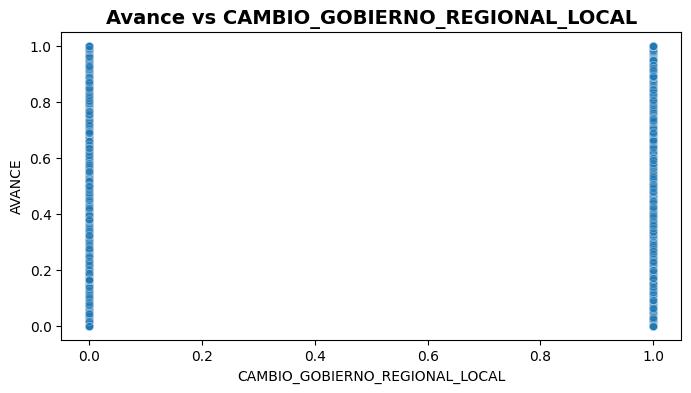

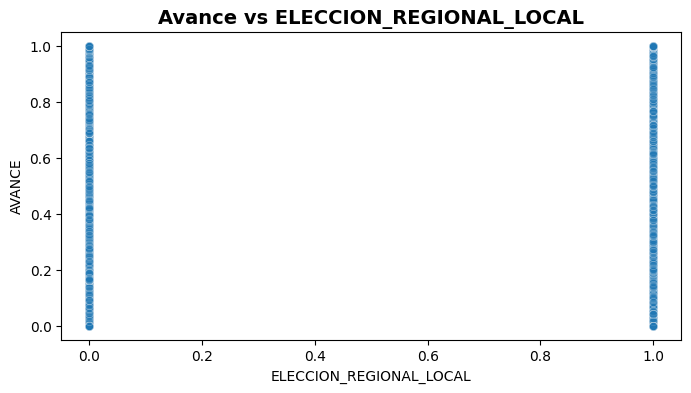

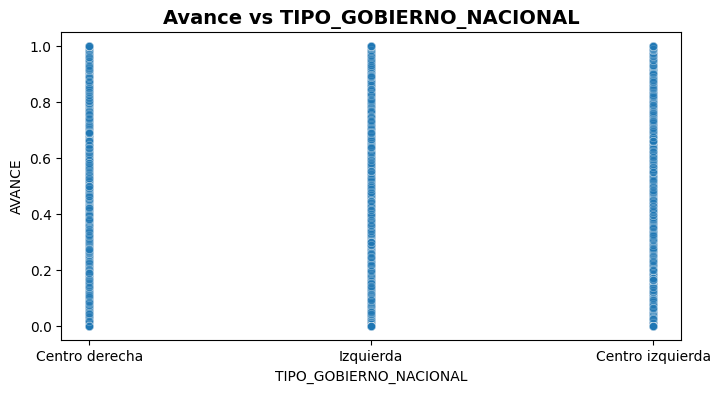

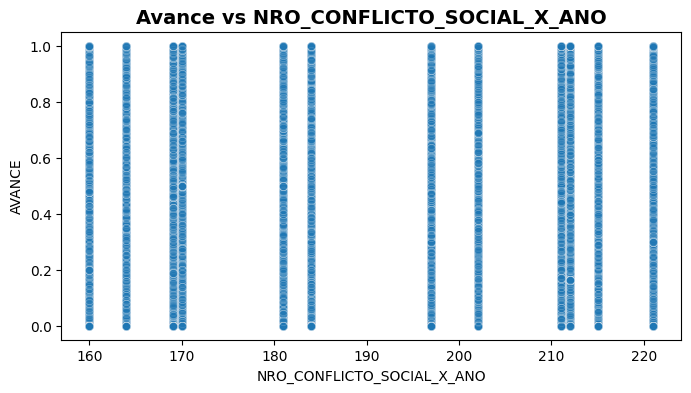

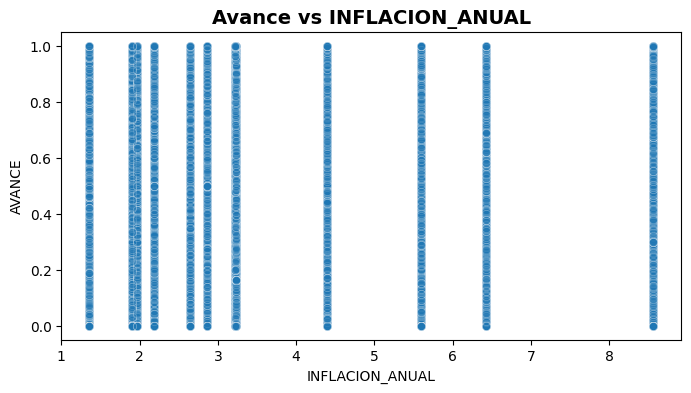

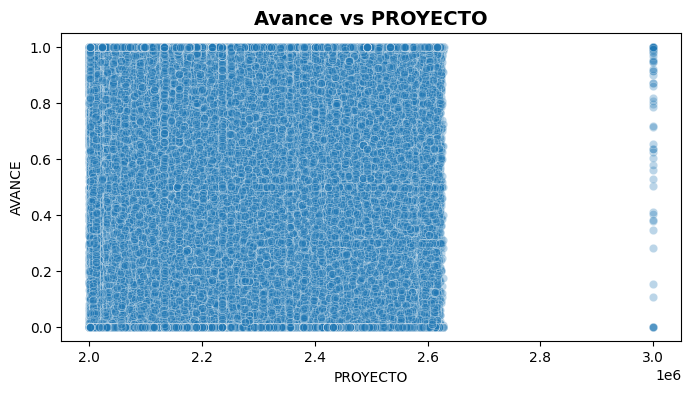

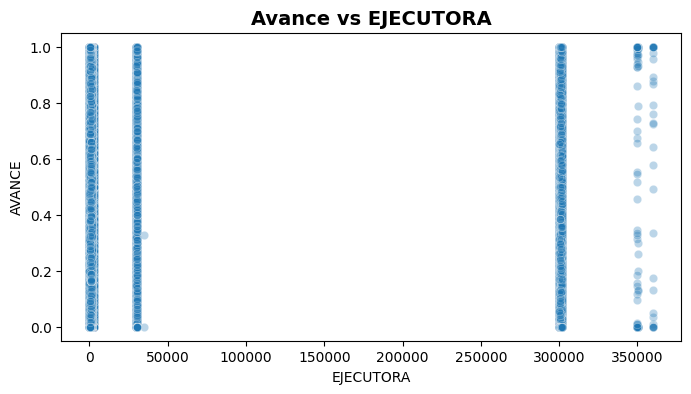

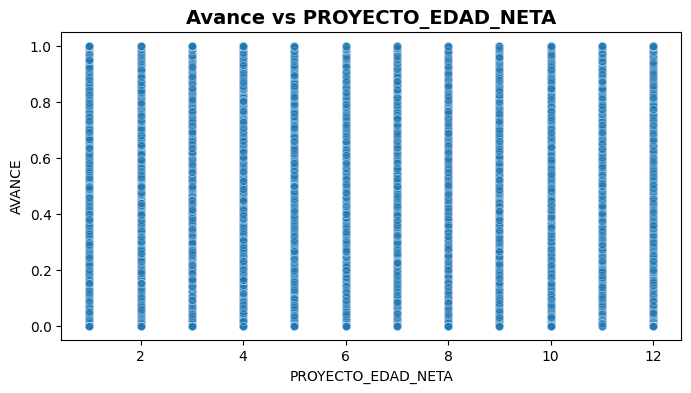

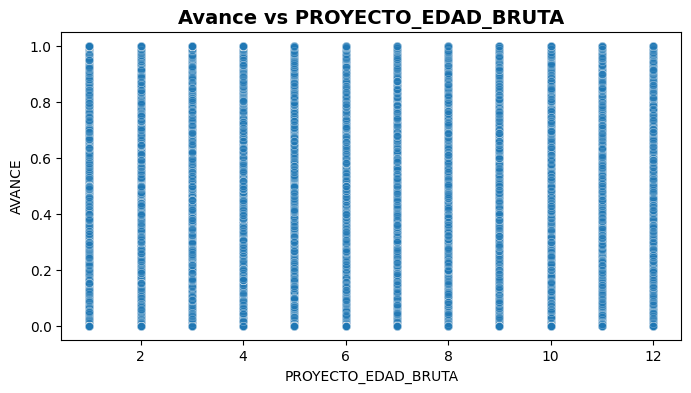

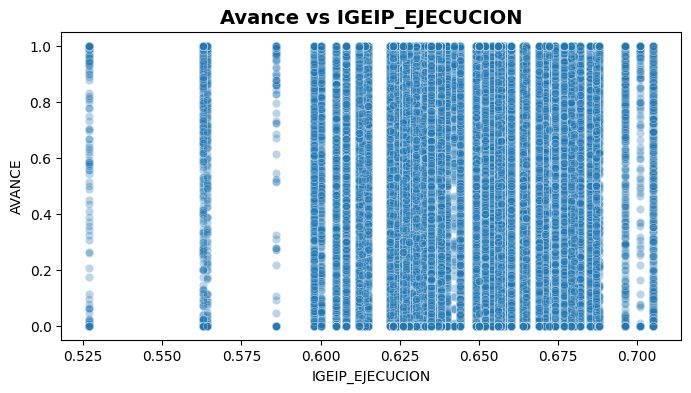

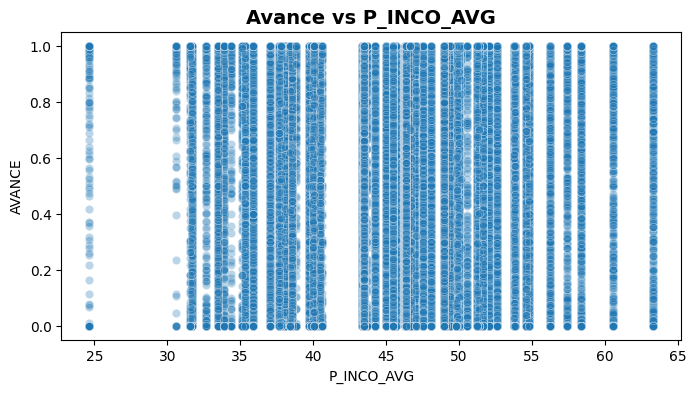

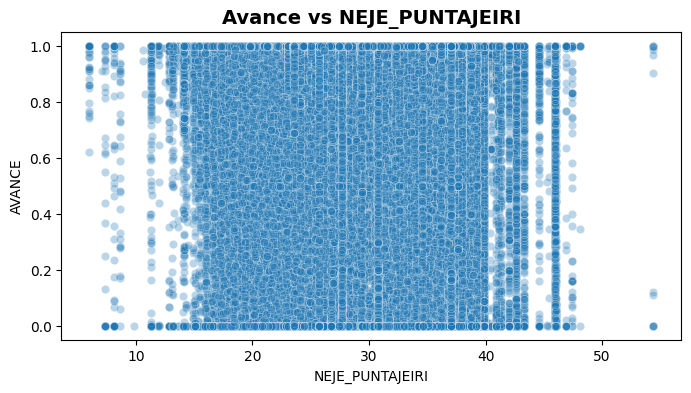

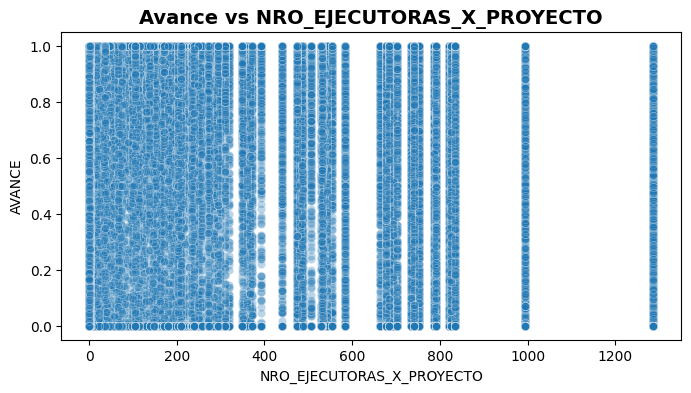

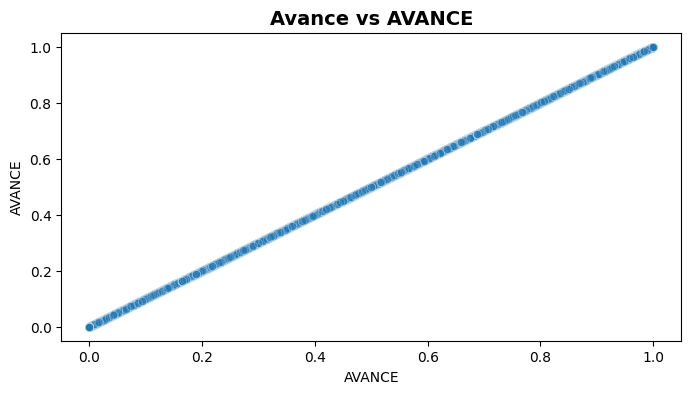

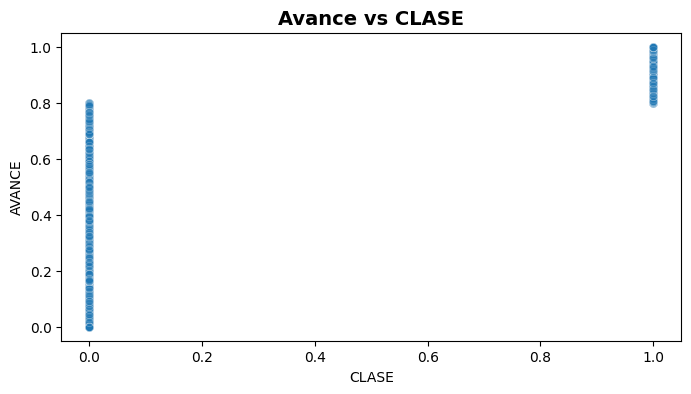

In [15]:
%matplotlib inline
for col in df_entrada.columns[1:]:
    fig = plt.figure(figsize=(8, 4))   
    sns.scatterplot(x=df_entrada[col], y=df_entrada.AVANCE, alpha=0.3)
    plt.title(f'Avance vs {col}', fontsize=14, fontweight='bold')
    plt.show()

### Agregando Ruido

<Axes: xlabel='DPTO', ylabel='CLASE'>

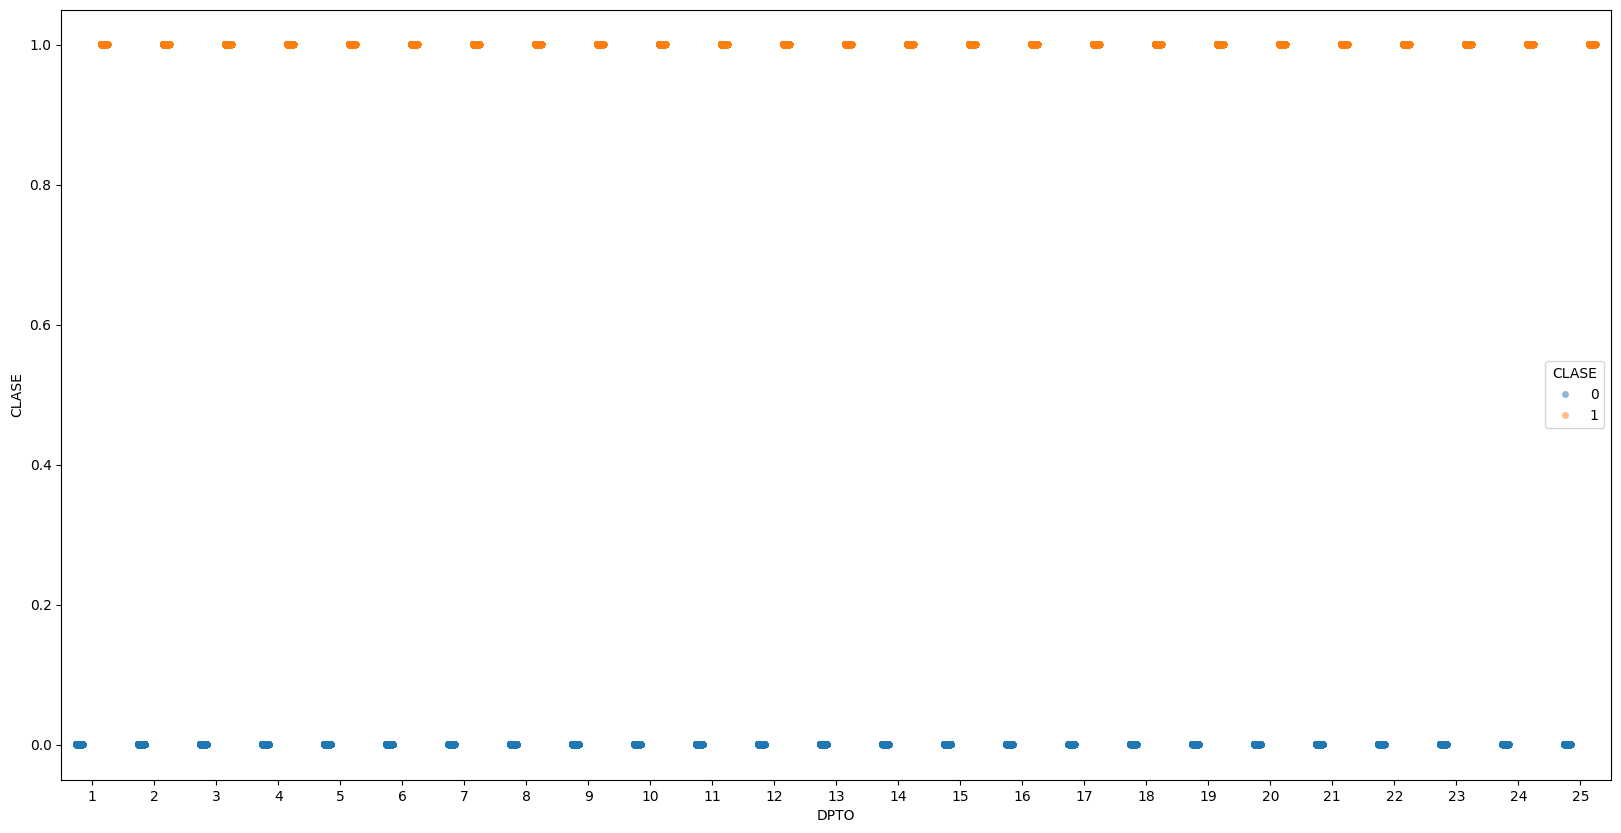

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))  # Aumentamos el ancho para estirar horizontalmente
sns.stripplot(
    x='DPTO'
    , y='CLASE'
    , data=df
    , jitter=True
    , hue='CLASE'
    , dodge=True
    , alpha=0.5
    )

In [ ]:
# for this goal we using boxplot
%matplotlib inline
for col in df_t1.select_dtypes(['object']):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_t1[col], y=df_t1.Selling_Price)
    plt.title(f"Selling_Price vs {col}", fontsize=16, fontweight='bold')
    plt.show()

# Classification Model : Logistic Regression

In [71]:
df = df_entrada.query('DEVENGADO >= 0')
df = df_entrada.query('PIM >= DEVENGADO')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627853 entries, 0 to 627869
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627853 non-null  int64  
 1   NIVEL                           627853 non-null  int64  
 2   NIVEL_GOBIERNO                  627853 non-null  object 
 3   DPTO                            627853 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627853 non-null  object 
 5   FUNCION                         627853 non-null  int64  
 6   FUNCION_NOMBRE                  627853 non-null  object 
 7   PIA                             627853 non-null  int64  
 8   PIM                             627853 non-null  int64  
 9   DEVENGADO                       627853 non-null  float64
 10  IP                              627853 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627853 non-null  int64  
 12  NRO_PRESIDENTES_X_ANO

### Drop

In [72]:
col_to_drop = ['ANIO'
                ,'NIVEL_GOBIERNO'
                ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
                ,'FUNCION_NOMBRE'
                ,'PIA'
                ,'DEVENGADO'
                ,'PROYECTO'
                , 'EJECUTORA'
                , 'AVANCE' 
                ]
               
df.drop(col_to_drop, axis='columns', inplace=True)

C:\Users\ycald\AppData\Local\Temp\ipykernel_22500\3945677497.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col_to_drop, axis='columns', inplace=True)


In [79]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 627853 entries, 0 to 627869
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NIVEL                           627853 non-null  int64  
 1   DPTO                            627853 non-null  int64  
 2   FUNCION                         627853 non-null  int64  
 3   PIM                             627853 non-null  int64  
 4   IP                              627853 non-null  float64
 5   CAMBIO_GOBIERNO_NACIONAL        627853 non-null  int64  
 6   NRO_PRESIDENTES_X_ANO           627853 non-null  int64  
 7   FENOMENO_NINO                   627853 non-null  int64  
 8   PANDEMIA                        627853 non-null  int64  
 9   CAMBIO_GOBIERNO_REGIONAL_LOCAL  627853 non-null  int64  
 10  ELECCION_REGIONAL_LOCAL         627853 non-null  int64  
 11  TIPO_GOBIERNO_NACIONAL          627853 non-null  object 
 12  NRO_CONFLICTO_SOCIAL_

NIVEL  DPTO  FUNCION      PIM    IP  CAMBIO_GOBIERNO_NACIONAL  \
0      1     6       22   650000  54.2                         0   
1      1     6       22  2569664  54.2                         0   
2      1     6       22  1741207  54.2                         0   
3      1     6       22  1953089  54.2                         0   
4      1     6       22   765194  54.2                         0   

   NRO_PRESIDENTES_X_ANO  FENOMENO_NINO  PANDEMIA  \
0                      1              0         0   
1                      1              0         0   
2                      1              0         0   
3                      1              0         0   
4                      1              0         0   

   CAMBIO_GOBIERNO_REGIONAL_LOCAL  ELECCION_REGIONAL_LOCAL  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

  TIPO_GOBIERNO_NACIONAL  NRO_CONFLICTO_SOCIAL_X_ANO  INFLACION_ANUAL  \
0       Centro izquierda                         164             2.65   
1       Centro izquierda                         164             2.65   
2       Centro izquierda                         164             2.65   
3       Centro izquierda                         164             2.65   
4       Centro izquierda                         164             2.65   

   PROYECTO_EDAD_NETA  PROYECTO_EDAD_BRUTA  CLASE  
0                   2                    6      0  
1                   8                    8      0  
2                   1                    1      0  
3                   1                    1      0  
4                   4                    4      0

### ONE HOT

In [80]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION']
df_one_hot = pd.get_dummies(df, columns=columns_to_one_hot_encode, dtype=int)

In [81]:
df_one_hot.iloc[:, 10:20].head()

PROYECTO_EDAD_NETA  PROYECTO_EDAD_BRUTA  CLASE  NIVEL_1  NIVEL_2  NIVEL_3  \
0                   2                    6      0        1        0        0   
1                   8                    8      0        1        0        0   
2                   1                    1      0        1        0        0   
3                   1                    1      0        1        0        0   
4                   4                    4      0        1        0        0   

   TIPO_GOBIERNO_NACIONAL_Centro derecha  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   TIPO_GOBIERNO_NACIONAL_Centro izquierda  TIPO_GOBIERNO_NACIONAL_Izquierda  \
0                                        1                                 0   
1                                        1                                 0   
2                                        1                                 0   
3                                        1                                 0   
4                                        1                                 0   

   DPTO_1  
0       0  
1       0  
2       0  
3       0  
4       0

### Renombrar

In [76]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

### NORMALIZACION

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
df_one_hot_scaled = scaler.fit_transform(df_one_hot)
#df_one_hot_scaled = pd.DataFrame(scaler.fit_transform(df_one_hot), columns=df_one_hot.columns)
df_one_hot_scaled = pd.DataFrame(df_one_hot_scaled, columns=df_one_hot.columns)
df_one_hot_scaled.head(4)

DPTO  FUNCION       PIM        IP  CAMBIO_GOBIERNO_NACIONAL  \
0  0.208333    0.875  0.000347  0.975518                       0.0   
1  0.208333    0.875  0.001374  0.975518                       0.0   
2  0.208333    0.875  0.000931  0.975518                       0.0   
3  0.208333    0.875  0.001044  0.975518                       0.0   

   NRO_PRESIDENTES_X_ANO  FENOMENO_NINO  PANDEMIA  \
0                    0.0            0.0       0.0   
1                    0.0            0.0       0.0   
2                    0.0            0.0       0.0   
3                    0.0            0.0       0.0   

   CAMBIO_GOBIERNO_REGIONAL_LOCAL  ELECCION_REGIONAL_LOCAL  ...  EJECUTORA  \
0                             0.0                      0.0  ...        0.0   
1                             0.0                      0.0  ...        0.0   
2                             0.0                      0.0  ...        0.0   
3                             0.0                      0.0  ...        0.0   

   PROYECTO_EDAD_NETA  PROYECTO_EDAD_BRUTA  CLASE  NIVEL_1  NIVEL_2  NIVEL_3  \
0            0.090909             0.454545    0.0      1.0      0.0      0.0   
1            0.636364             0.636364    0.0      1.0      0.0      0.0   
2            0.000000             0.000000    0.0      1.0      0.0      0.0   
3            0.000000             0.000000    0.0      1.0      0.0      0.0   

   tgn_centro_derecha  tgn_centro_izquierda  tgn_izquierda  
0                 0.0                   1.0            0.0  
1                 0.0                   1.0            0.0  
2                 0.0                   1.0            0.0  
3                 0.0                   1.0            0.0  

[4 rows x 22 columns]

In [16]:
df_one_hot_scaled.info()

NameError: name 'df_one_hot_scaled' is not defined

In [61]:
X = df_one_hot_scaled.drop(['CLASE'], axis=1)
y = df_one_hot_scaled['CLASE'].values

As shown in the above barplots and table

Most of the cars use Petrol fuel and only two cars use CNG fuel.
Most of the cars are of manual gear type.
Most cars are sold by dealers.

In [24]:
df_one_hot_scaled.to_csv('../data/df_one_hot_scaled.csv', index=False)

## ENTRENAMIENTO DEL MODELO DE CLASIFICACION

In [62]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [99]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.6071163116651447


## Evaluacion del modelo

In [100]:
model.predict_proba(X_test)

array([[0.36465068, 0.63534932],
       [0.4008963 , 0.5991037 ],
       [0.39096645, 0.60903355],
       ...,
       [0.43016748, 0.56983252],
       [0.6414999 , 0.3585001 ],
       [0.47570563, 0.52429437]])

Axes(0.125,0.11;0.775x0.77)


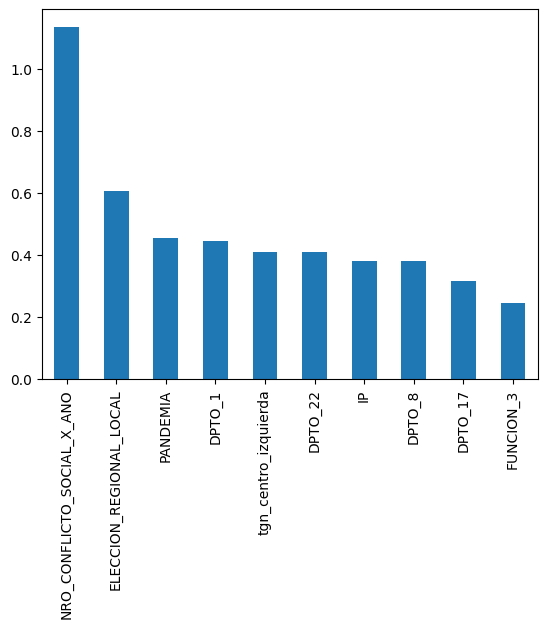

In [101]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


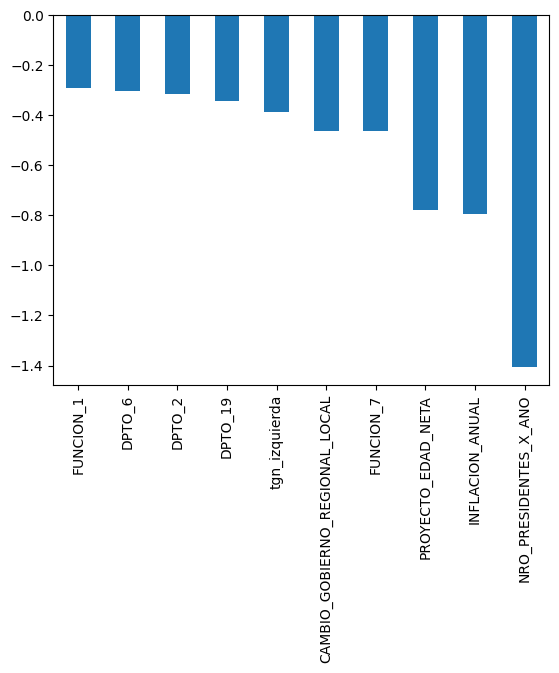

In [102]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

## SVM

In [2]:
from sklearn.svm import SVC

In [3]:
# 2. Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)  # Puedes ajustar el kernel y otros parámetros según sea necesario
svm_model.fit(X_train, y_train)

# 3. Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# 4. Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# 5. Calcular la precisión del modelo
accuracy = svm_model.score(X_test, y_test)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

NameError: name 'X_train' is not defined

## Random Forest

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.6256
Training time: 27.00 seconds
Prediction time: 2.23 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54     77683
         1.0       0.68      0.69      0.68    110673

    accuracy                           0.63    188356
   macro avg       0.61      0.61      0.61    188356
weighted avg       0.62      0.63      0.63    188356


Confusion Matrix:
[[41669 36014]
 [34502 76171]]


In [22]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
26 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
  File

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.6657
Training time: 149.51 seconds
Prediction time: 8.98 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53     77683
         1.0       0.68      0.81      0.74    110673

    accuracy                           0.67    188356
   macro avg       0.66      0.64      0.64    188356
weighted avg       0.66      0.67      0.65    188356


Confusion Matrix:
[[35759 41924]
 [21043 89630]]


## SVM

In [23]:
# 3. SVM
print("Training SVM model...")
svm_model = SVC(kernel='linear', random_state=42)
train_and_evaluate(svm_model, X_train, X_test, y_train, y_test)

Training SVM model...
Accuracy: 0.5884
Training time: 93174.63 seconds
Prediction time: 2910.32 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.11      0.17     77683
         1.0       0.60      0.93      0.73    110673

    accuracy                           0.59    188356
   macro avg       0.55      0.52      0.45    188356
weighted avg       0.56      0.59      0.50    188356


Confusion Matrix:
[[  8212  69471]
 [  8059 102614]]


## CLASIFICACION CON EJECUTORA

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439497 entries, 317047 to 121958
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PIM                             439497 non-null  float64
 1   IP                              439497 non-null  float64
 2   CAMBIO_GOBIERNO_NACIONAL        439497 non-null  float64
 3   NRO_PRESIDENTES_X_ANO           439497 non-null  float64
 4   FENOMENO_NINO                   439497 non-null  float64
 5   PANDEMIA                        439497 non-null  float64
 6   CAMBIO_GOBIERNO_REGIONAL_LOCAL  439497 non-null  float64
 7   ELECCION_REGIONAL_LOCAL         439497 non-null  float64
 8   NRO_CONFLICTO_SOCIAL_X_ANO      439497 non-null  float64
 9   INFLACION_ANUAL                 439497 non-null  float64
 10  EJECUTORA                       439497 non-null  float64
 11  PROYECTO_EDAD_NETA              439497 non-null  float64
 12  PROYECTO_EDAD_BR

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [65]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.5947567372422434
